In [5]:
## first softmax version
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.stats import multivariate_normal
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit, softmax
import matplotlib.pyplot as plt
from gp_softmax import generate_synthetic_data,Aladynoulli,plot_synthetic_data,plot_model_fit
from gp_softmax_torch import AladynSurvivalModel


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


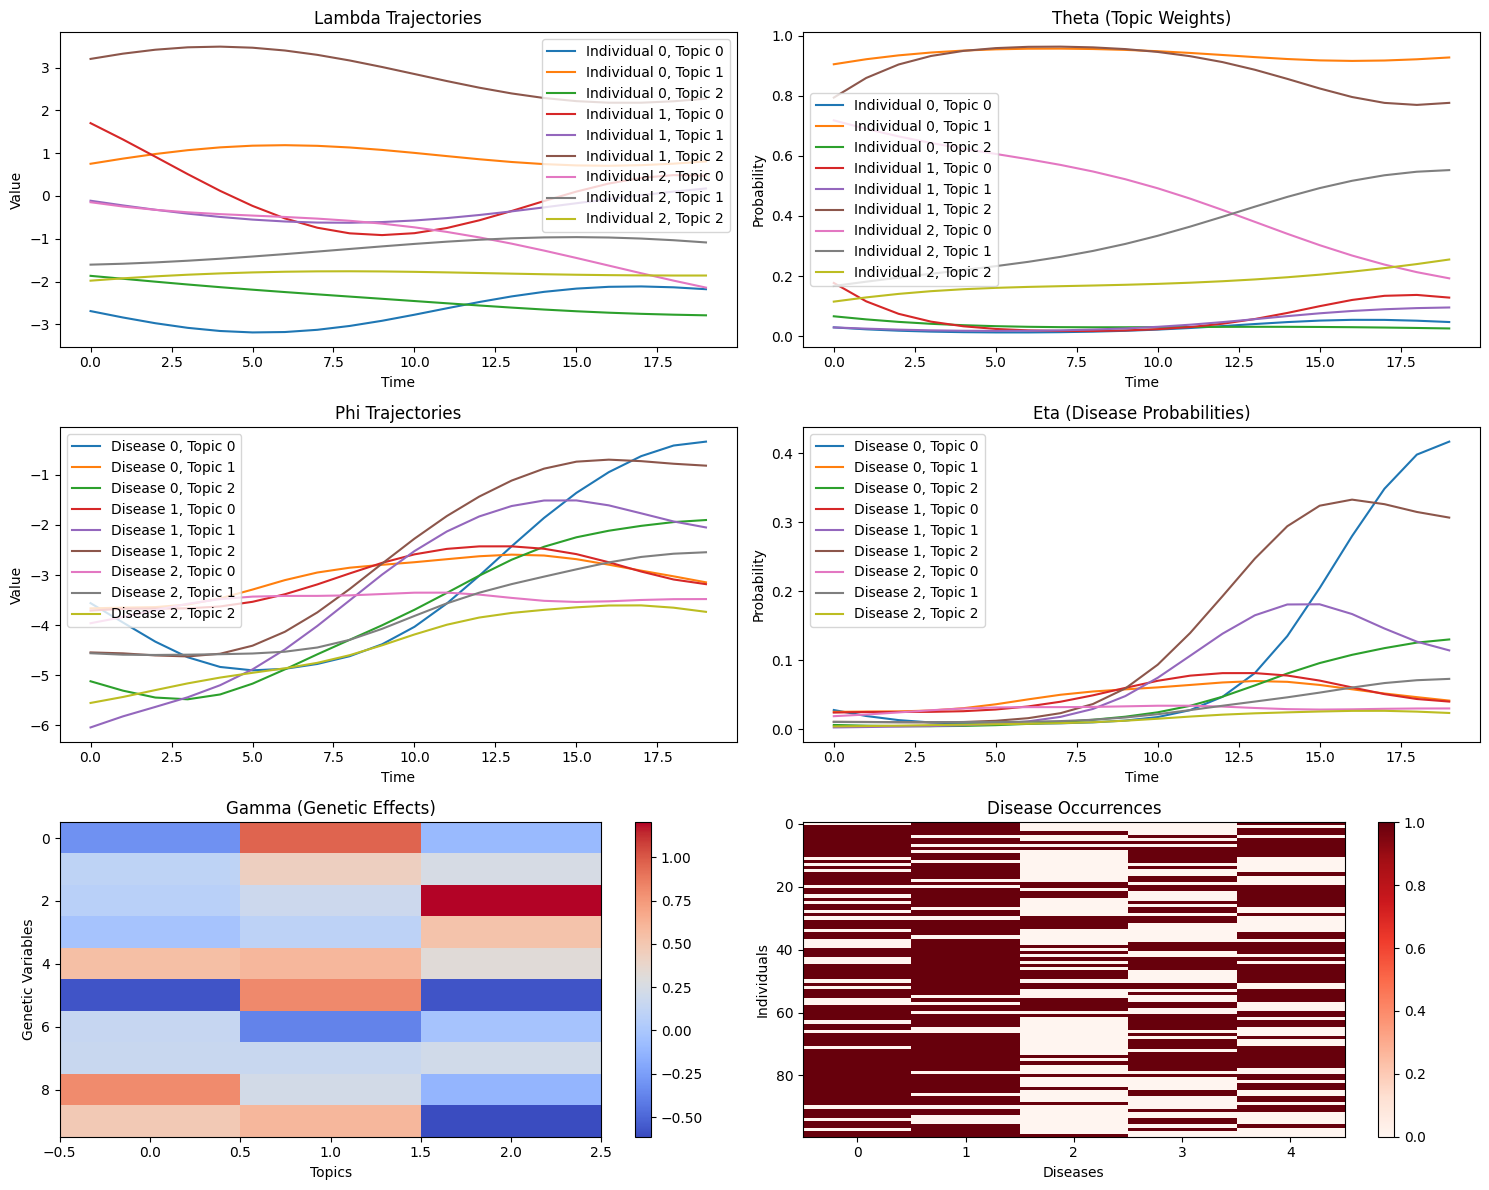

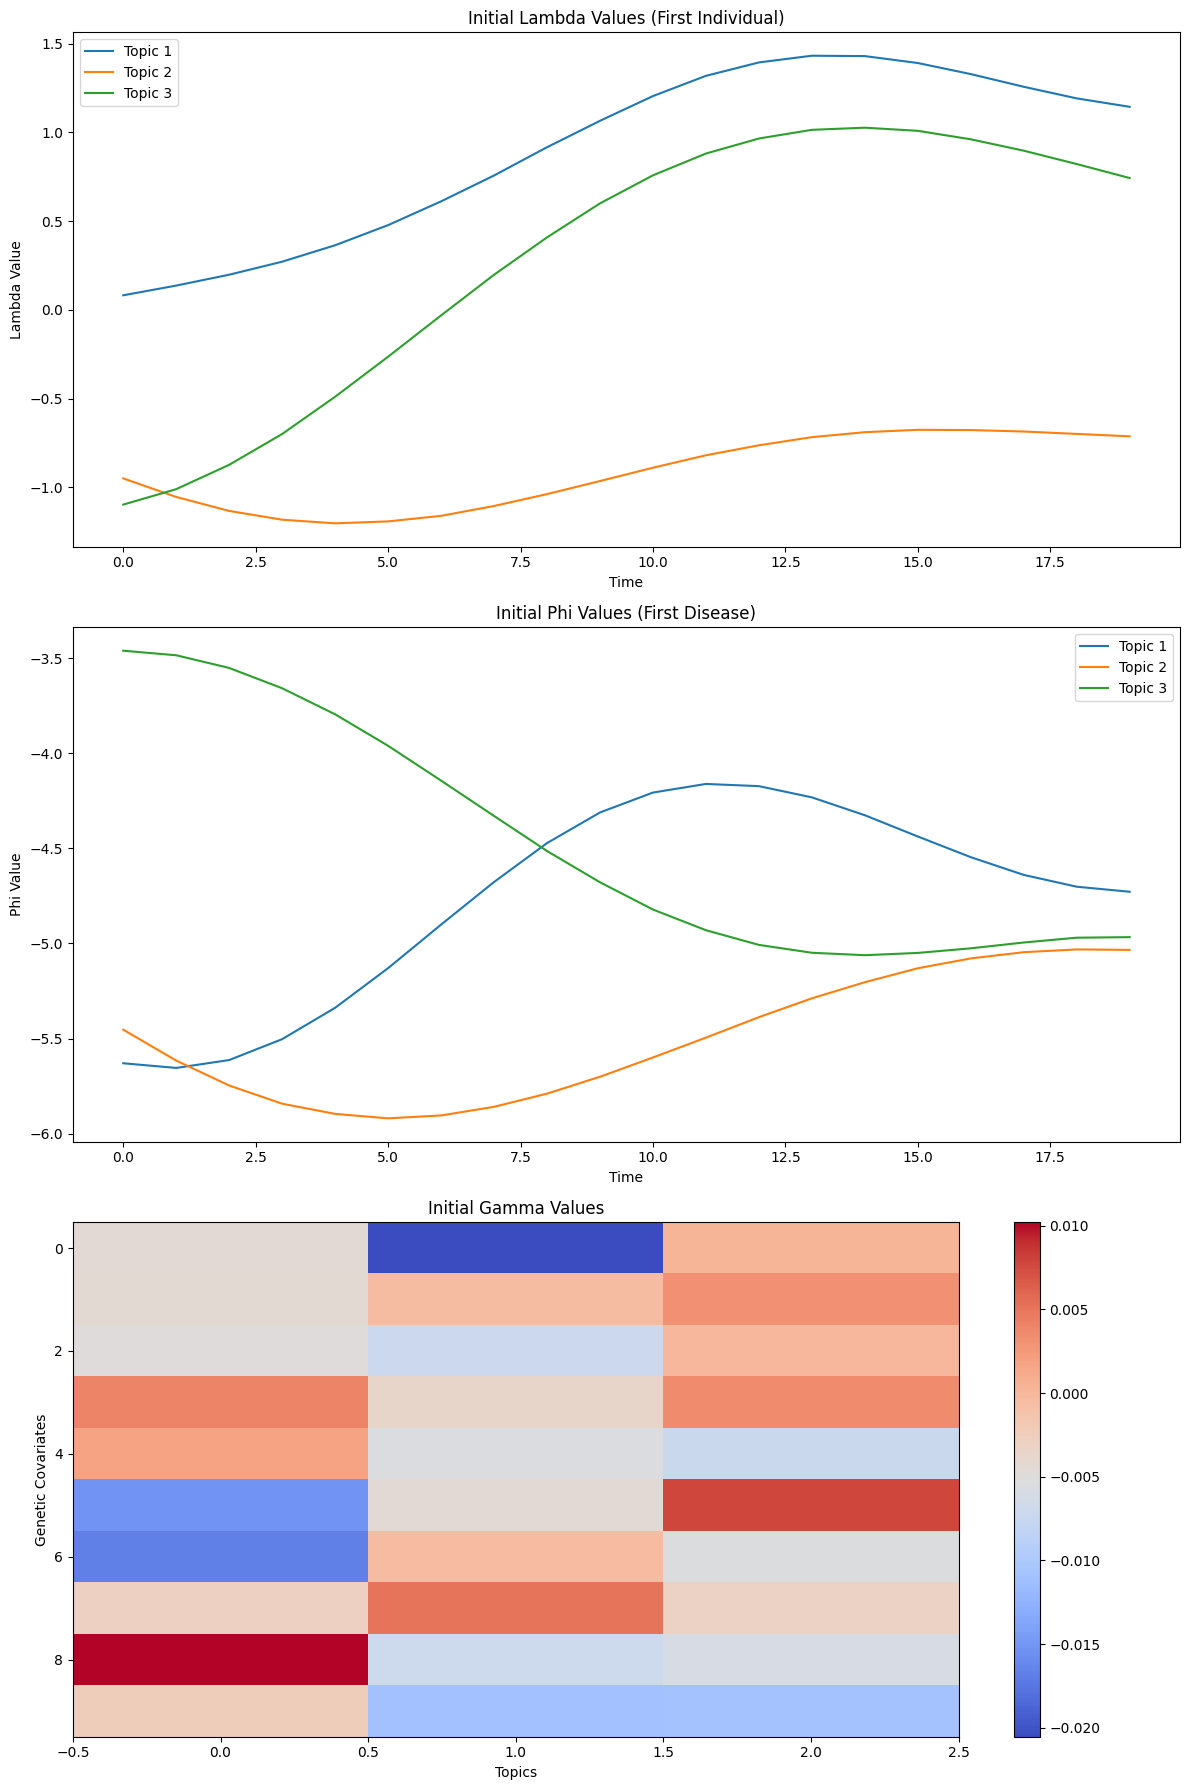

Epoch 0, Loss: 249957644.4367, Learning Rate: 0.001000
Stopping early at epoch 50 due to learning rate decay


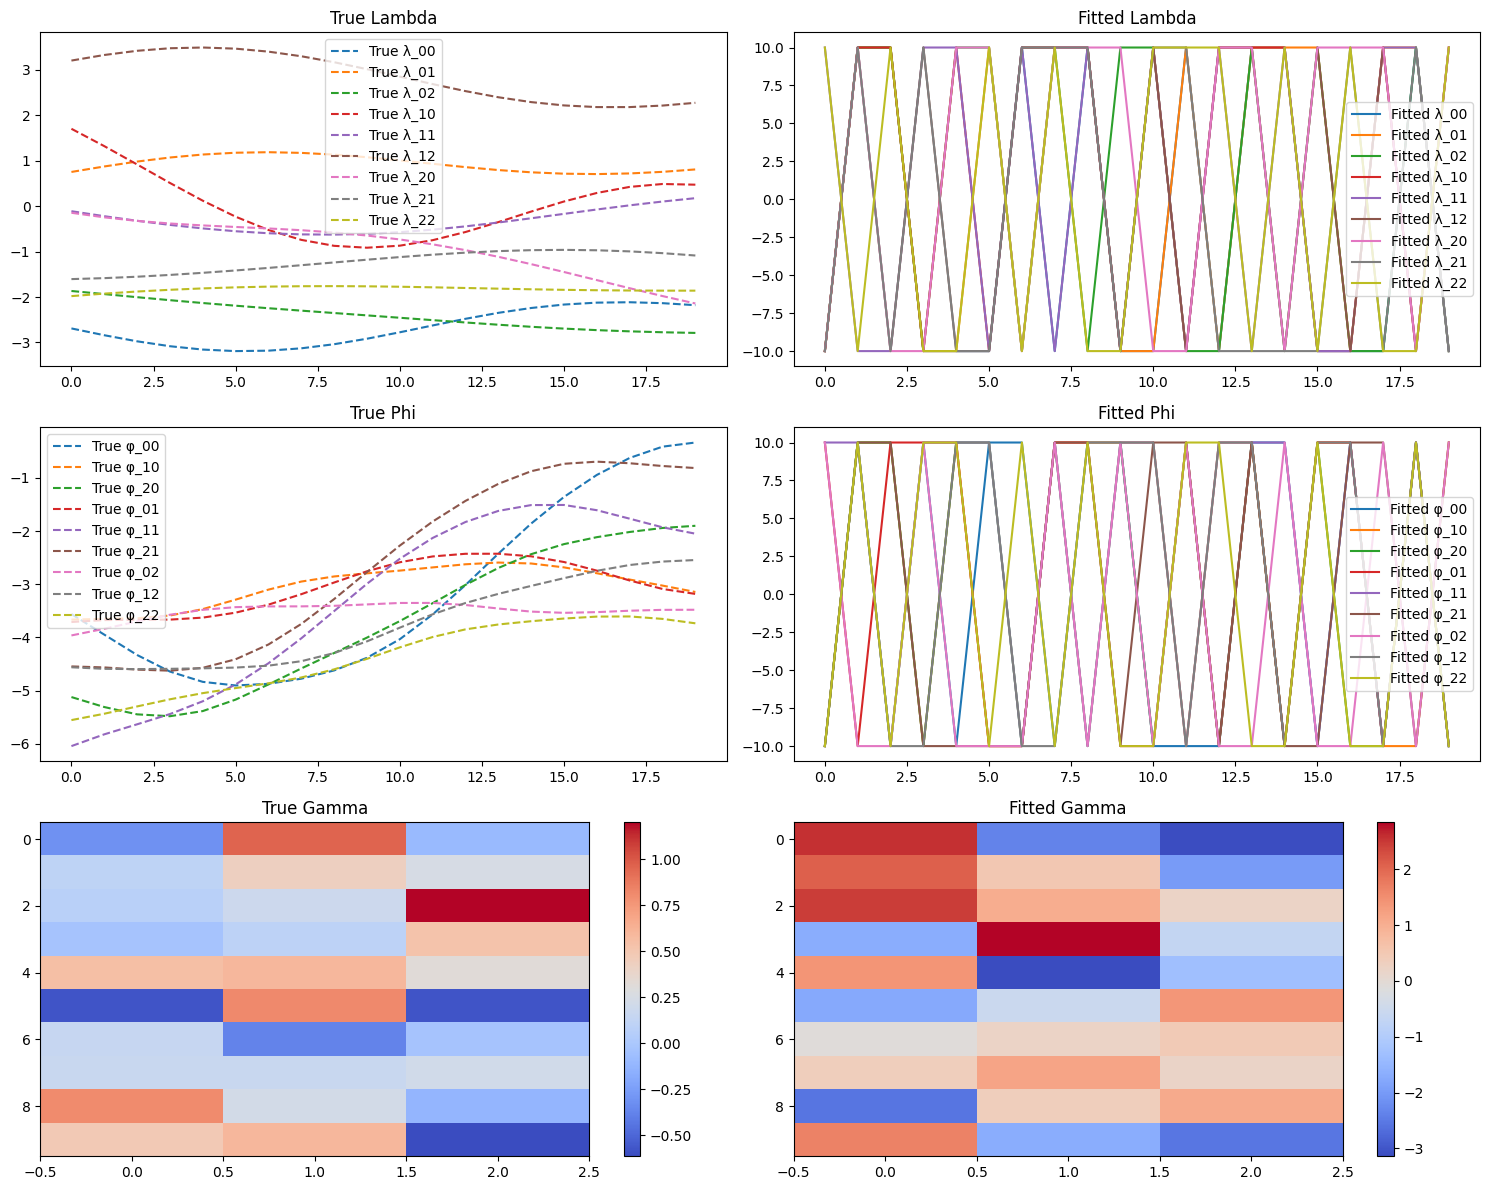

In [2]:
# 1. Generate synthetic data
data = generate_synthetic_data(
    N=100,    # number of individuals
    D=5,      # number of diseases
    T=20,     # number of timepoints
    K=3,      # number of topics
    P=10,     # number of genetic covariates
    seed=42   # for reproducibility
)

# 2. Visualize the generated synthetic data
plot_synthetic_data(data, num_individuals=3, num_diseases=3)

# 3. Initialize the model
model = Aladynoulli(
    n_topics=3, 
    n_individuals=100, 
    n_diseases=5, 
    n_timepoints=20, 
    n_genetics=10,
    length_scales=data['length_scales_lambda'],
    amplitudes=data['var_scales_lambda']
)

# 4. Initialize parameters and visualize initialization
model.initialize_params(Y=data['Y'], G=data['G'], prevalence=data['prevalence'])
# This will automatically call visualize_initializations() at the end

# 5. Fit the model
results = model.fit(Y=data['Y'], n_epochs=1000, learning_rate=1e-3)

# 6. Plot the model fit against true data
plot_model_fit(model, data, num_individuals=3, num_diseases=3)

## Torch

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [13]:
# Generate data
Y_np, G_np, prevalence_np, length_scales_np, amplitudes_np, event_times_np = generate_synthetic_data(
    N=100, D=5, T=50, K=3, P=5
)

# Initialize model
model = AladynSurvivalModel(
    N=100, D=5, T=50, K=3, P=5,
    G=G_np,
    length_scales=length_scales_np,
    amplitudes=amplitudes_np,
    prevalence=prevalence_np
)

# Convert data to torch tensors
Y = torch.tensor(Y_np, dtype=torch.float32)
event_times = torch.tensor(event_times_np, dtype=torch.long)

# Train
optimizer = optim.Adam(model.parameters(), lr=1e-3)
for epoch in range(1000):
    optimizer.zero_grad()
    loss = model.compute_loss(Y, event_times)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

ValueError: too many values to unpack (expected 6)